In [49]:
################################ARIMA#######################
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

<ipython-input-50-921c81c6d678>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Date
2013-01-03    4327
2013-01-04    4486
2013-01-05    4997
2013-01-07    7176
2013-01-08    5580
Name: Sale, dtype: int64


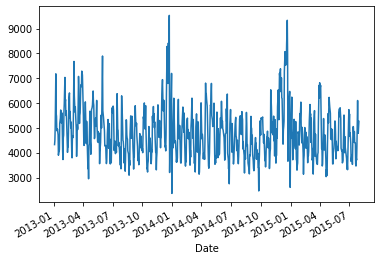

In [50]:
import os
import numpy as np
from pandas import read_csv, DataFrame
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

def parser(x):
	return datetime.strptime(x, '%d/%m/%Y')

file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1_Data_FULL.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
df = read_csv(os.path.basename(file), header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(df.head())
df.plot()
pyplot.show()

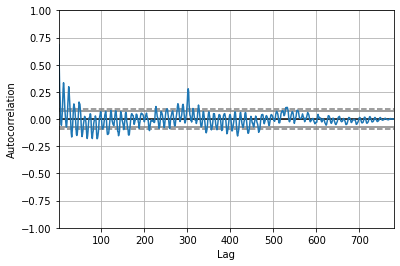

In [51]:
autocorrelation_plot(df)
pyplot.show()


C:\Users\gurpr\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\gurpr\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\gurpr\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                  780
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6267.207
Date:                Tue, 06 Apr 2021   AIC                          12546.413
Time:                        11:40:50   BIC                          12574.361
Sample:                             0   HQIC                         12557.163
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1451      0.027     -5.442      0.000      -0.197      -0.093
ar.L2         -0.0913      0.047     -1.948      0.051      -0.183       0.001
ar.L3         -0.2095      0.041     -5.086      0.0

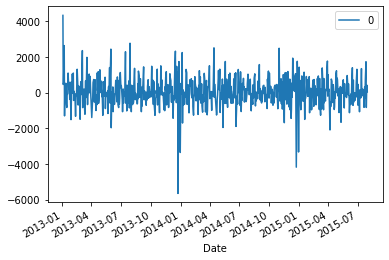

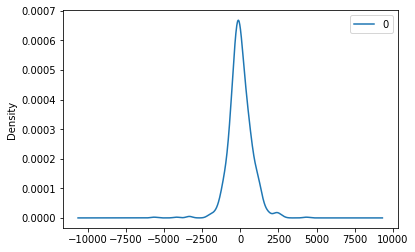

In [52]:
# fit model
model = ARIMA(df, order=(5,1,0))
# order=(p,d,q) p is number of lag observations, d is number of times raw observations are differnced, q is size of moving average window
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
from pandas import read_csv, DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [53]:
# split into train and test sets
X = df.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))

In [54]:
#print(predictions)
out = np.array(predictions)
out.shape

(195,)

In [55]:
out = out.astype(int)
print(out)
#np.savetxt("arima_pred.csv", out,delimiter='\n', fmt="%i")
#yhat.to_csv(r'C:\Users\gurpr\Videos\BetaSci\theta.csv', index=False, header=True)

[6216 6300 5279 4389 5279 5080 5335 7023 7672 7310 7424 7463 7454 8263
 9232 7887 4218 6196 6851 6076 4049 4973 5576 5157 5811 4072 4426 3656
 5041 4988 5005 4462 4407 4125 5198 3953 3622 3814 3204 3912 4563 4731
 4491 4466 4837 5553 5123 6003 4945 4577 4803 4801 4917 3994 3511 3739
 4023 4507 5039 4103 4770 4272 4257 4901 4287 3850 4064 4017 3903 4806
 4997 5670 5348 5362 4645 5167 4996 3610 4319 4079 3343 3808 5153 5209
 4793 3979 4658 4155 3903 4024 3411 3729 3876 4018 4914 6370 5801 6498
 6550 6269 4746 4265 4197 3391 4708 5065 4658 4017 4284 4466 4659 3835
 3289 3413 3204 3256 4339 5185 4943 5497 6063 5470 5677 4741 4937 4837
 4591 5210 3600 3706 4221 3968 4541 5121 5036 4611 3961 4386 4429 4115
 4381 3986 4630 5401 5570 5307 5703 5318 4264 4374 4270 3690 3885 3815
 4120 5372 4713 3934 4746 4103 4089 4193 3667 3547 3565 3463 3884 5100
 5351 5082 5380 4676 4648 4723 3641 4113 3966 3821 3703 4854 4942 4485
 4654 4579 4489 4378 3868 3441 3997 3656 4367 5848 4808 4600 5212]


Test RMSE: 785.355


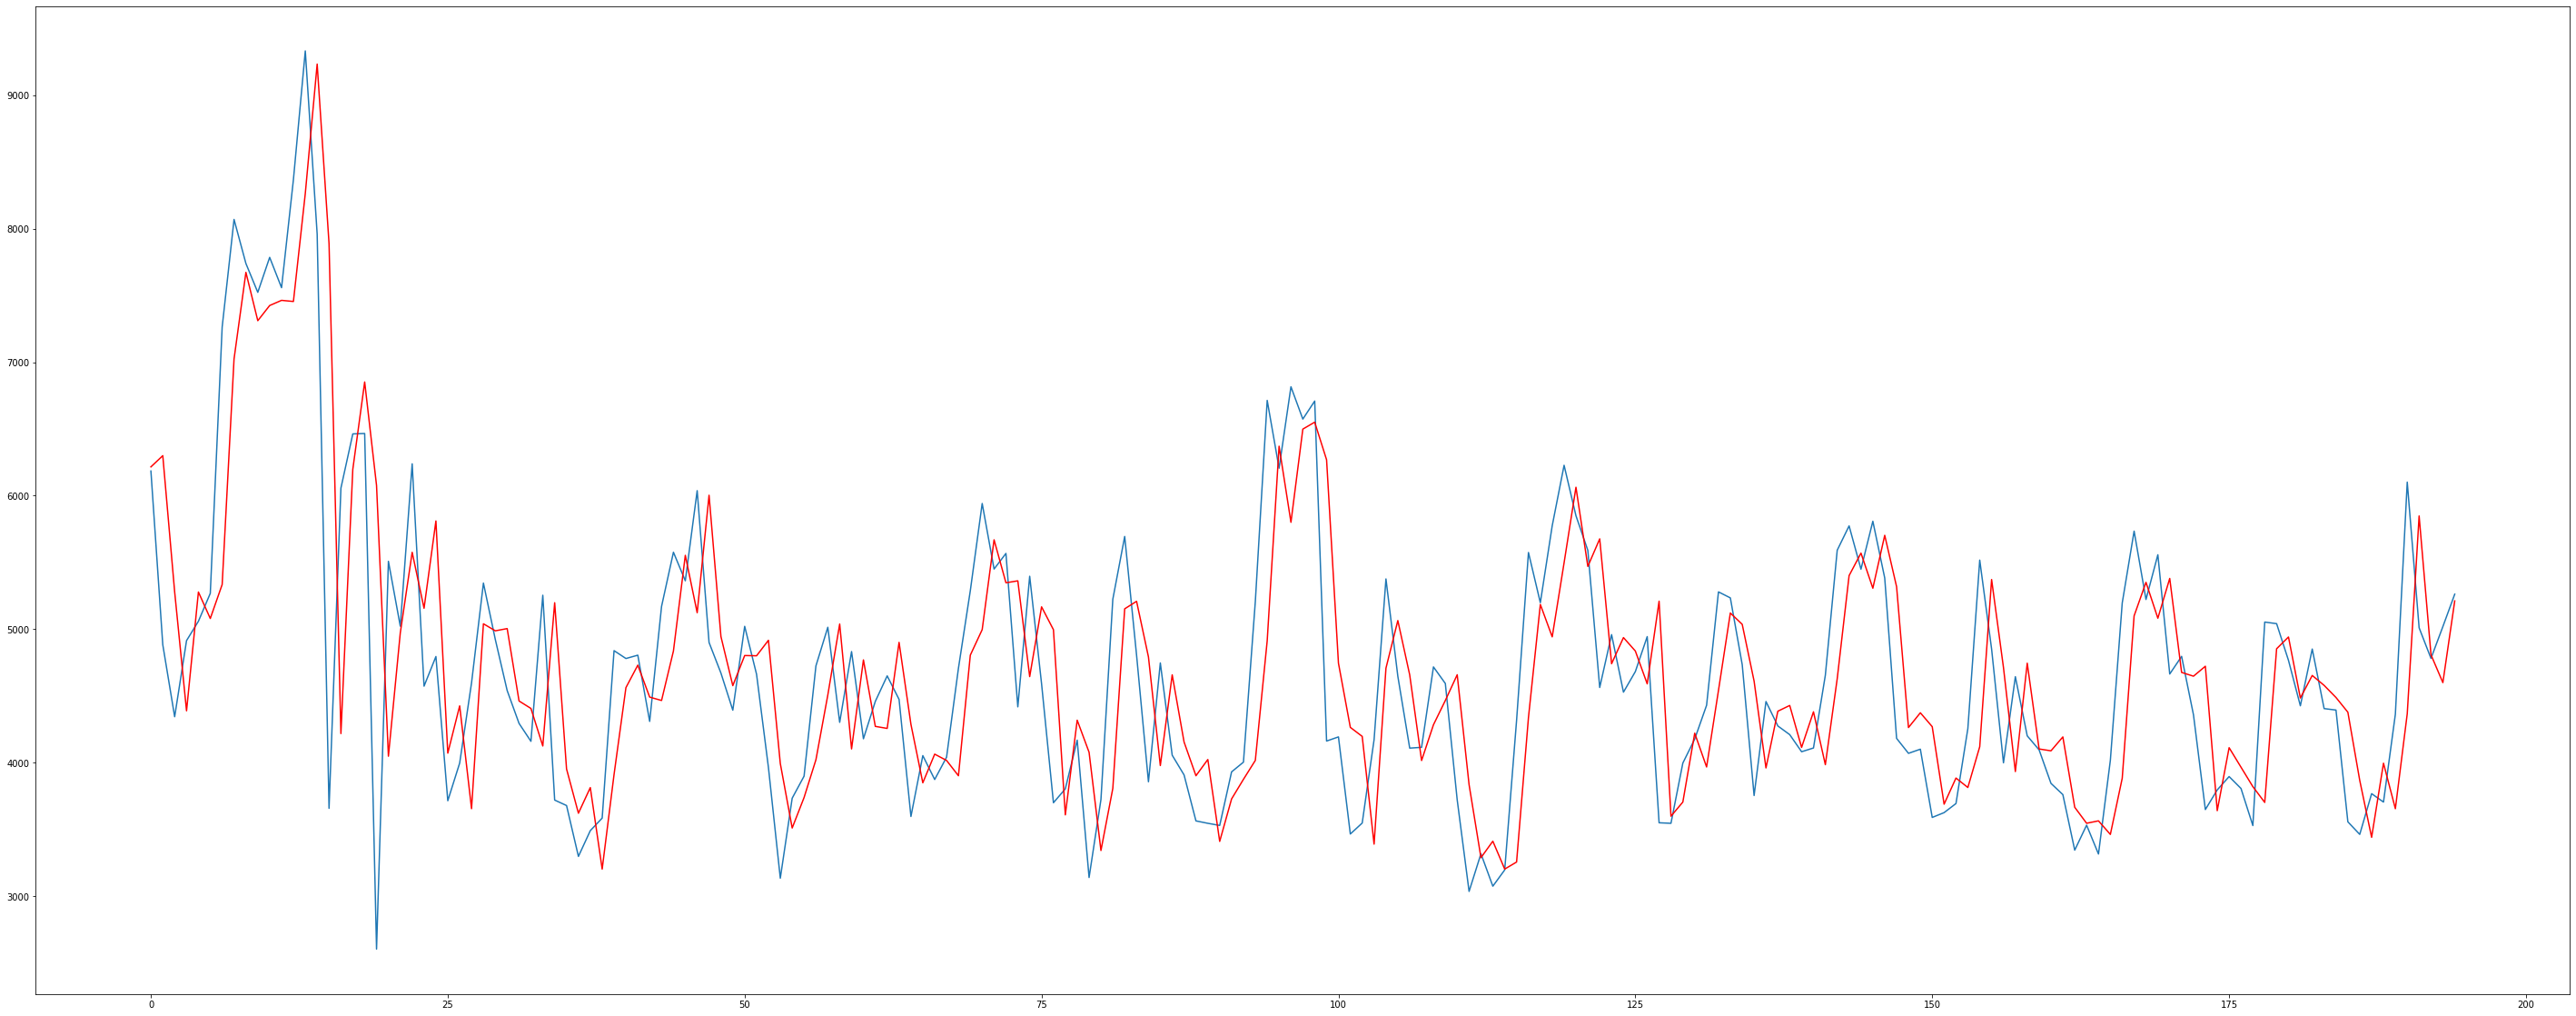

In [56]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.figure(figsize=(50,20))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.savefig('arima.png')
pyplot.show()

